<a href="https://colab.research.google.com/github/skck0226/2022S-ML/blob/main/HW1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1 :: Data preprocessing & KNN

데이터를 불러오는 방법에는 크게 두 가지가 있습니다.
1. 제공된 csv 파일을 코랩 노트북 파일이 있는 드라이브 폴더 경로에 업로드하기
  * 본 노트북 파일과 csv 파일을 같은 드라이브 폴더에 넣기 
  * 아래의 **`코랩과 구글 드라이브 연동하기`** 코드를 사용하여 본인 계정의 구글 드라이브와 코랩 환경을 연동하여 사용
  * 연동하는 코드를 사용하지 않고, **`왼쪽 툴바>다섯 번째 폴더 모양 클릭>파일 글씨 아래에 세 번째 아이콘(드라이브 마운트) 클릭`** 으로도 구글 드라이브와 해당 코랩 세션을 연동할 수 있음
2. 제공된 csv 파일을 직접 코랩 노트북에 업로드하기
  * 코랩 화면에서 **`왼쪽 툴바>다섯 번째 폴더 모양 클릭>파일 글씨 바로 밑에 있는 아이콘(세션 저장소에 업로드) 클릭>로컬에서 파일 업로드`**

어느 방법을 사용하셔도 상관 없습니다. 하지만 리눅스 계열 명령어(pwd, ls, cd) 등을 이용해서 경로를 잘 확인해주세요. 경로를 맞추지 않으면 csv 파일을 불러올 때 에러가 발생합니다. 아래 코드는 코랩과 구글 드라이브를 코드로 연결하는 방법입니다.

## 코랩과 구글 드라이브 연동하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pwd 명령어로 현재 위치 확인
!pwd

/content


In [8]:
ls

 heart.csv  'HW0.ipynb의 사본'  'HW1.ipynb의 사본'


In [7]:
cd Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


## 데이터 불러오기 & 살펴보기

In [10]:
# 이번 과제는 numpy, pandas와 같은 데이터를 불러내고 확인, 처리, 
# 수정 등을 쉽게 할 수 있는 library를 사용합니다.

# 모듈 이름 뒤에 as를 쓰고 별칭을 적으면 해당 별칭으로 모듈을 호출할 수 있습니다.
# 모듈명: numpy, 별칭: np => numpy를 쓰는 대신 np를 써서 numpy 호출
# 모듈명: pandas, 별칭: pd => pandas를 쓰는 대신 pd를 써서 pandas 호출
import numpy as np
import pandas as pd


In [11]:
# './'는 이 노트북 파일의 현재 위치를 뜻 합니다.
path = './heart.csv'

# pandas의 read_csv 함수를 사용하여 csv파일을 DataFrame으로 불러옵니다.
data = pd.read_csv(path)

In [12]:
# DataFrame 혹은 Series와 같은 자료구조에 shape함수를 통해 데이터의 크기와 
# 변수의 갯수를 대략적으로 알 수 있습니다.

data.shape # (1190, 12) => 1190 개의 row(행), 12 개의 column(열)을 가진 데이터

(1190, 12)

In [ ]:
# head() 함수를 이용하여 해당 데이터의 맨 위 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,51,M,ASY,128,0,0,Normal,107,N,0.0,Up,0
1,48,M,ASY,140,208,0,Normal,159,Y,1.5,Up,1
2,64,F,ASY,142,276,0,Normal,140,Y,1.0,Flat,1
3,40,M,ATA,130,275,0,Normal,150,N,0.0,Up,0
4,63,M,ASY,130,330,1,LVH,132,Y,1.8,Up,1


In [ ]:
# tail() 함수를 이용하여 해당 데이터의 맨 뒤 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1185,41,M,NAP,130,214,0,LVH,168,N,2.0,Flat,0
1186,63,M,ASY,150,0,0,Normal,86,Y,2.0,Flat,1
1187,50,M,ATA,120,168,0,Normal,160,N,0.0,Up,0
1188,49,M,ASY,130,341,0,Normal,120,Y,1.0,Flat,1
1189,49,M,ATA,130,266,0,Normal,171,N,0.6,Up,0


In [ ]:
# DataFrame을 이루고 있는 column의 이름을 확인합니다.

data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# DataFrame을 이루고 있는 column 별 데이터의 타입을 확인합니다.

data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
# describe()는 각 column에 대해 통계량을 요약해주는 함수입니다.
# 기본적으로 NaN(누락데이터)는 제외하고 데이터 요약이 수행됩니다.

data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.425210,132.413445,199.714286,0.236975,137.127731,0.871176,0.560504
std,9.476581,18.270433,109.352682,0.425405,25.259171,1.053458,0.496534
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,175.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,224.500000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,268.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 문제 1

* 보고서에 설명된 것을 바탕을 주어진 데이터의 변수들의 타입을 보고서에 기술하세요.

  * 기술 형식 : 1. 변수 이름: categorical, nominal 
  * 타입은 대분류, 소분류 형식으로 적으세요. 예) 대분류(categorical), 소분류(nomial)

답)Age:  수치형,discrete / Sex: 범주형,명목형 / ChestPainType: 범주형, 순위형 / RestingBP: 수치형,continuous /  Cholesterol: 수치형,discrete / FastingBS: 수치형,continuous / RestingECG: 범주형,순위형 / MaxHR: 수치형,discrete / ExerciseAngina: 범주형,명목형 / Oldpeak: 수치형,continuous / ST_Slope: 범주형,순위형 / HeartDisease: 범주형,명목형

## 문제 2
* 중복값을 확인하고 중복값을 제거한 후 DataFrame의 차원을 확인하는 코드를 작성하여 캡처 후 보고서에 업로드하세요.

In [ ]:
# isnull()는 DataFrame에 있는 결측치(NA)를 boolean 값으로 반환하는 함수입니다.
# 결측치가 있으면 True를 반환합니다.

data.isnull().head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# isnull()에 sum() 를 결합하여 DataFrame에 있는 결측치의 합을 구합니다.

data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# duplicated()는 중복된 데이터를 Series 형식으로 반환합니다.

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1185    False
1186    False
1187    False
1188    False
1189    False
Length: 1190, dtype: bool

In [ ]:
# duplicated()에 sum()을 결합하여 DataFrame에 있는 중복 데이터의 합을 구합니다.

data.duplicated().sum()

272

In [13]:
################  문제 2  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################
df = pd.DataFrame(data=data)
after_drop = df.drop_duplicates()
print(after_drop.shape)
# data.shape의 결과까지 캡처하여 보고서에 업로드 하세요.
################ 코드 끝  #####################

(918, 12)


## 문제 3
* outlier 처리하기


### 문제 3-1
* Age, RestingBP, Cholesterol, MaxHR, Oldpeak column에 대해 각각 box plot을 그리고 캡처하여 결과를 보고서에 업로드하세요. (box plot을 그리는 모든 패키지 사용 가능)
  * column의 이름이 box plot의 x축에 나타나도록 하세요.
* outlier가 있는 column의 이름을 모두 보고서에 쓰세요.

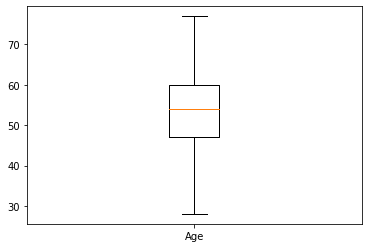

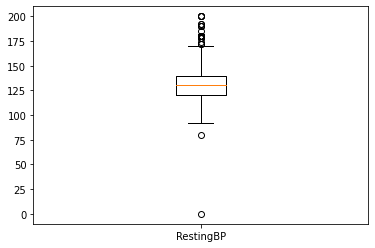

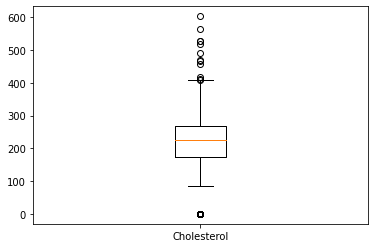

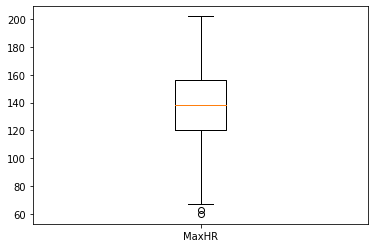

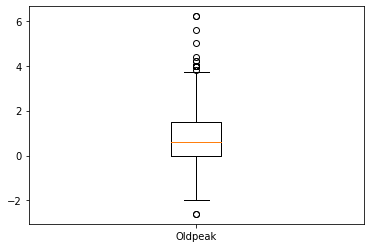

In [14]:
## 코드 작성
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])
plt.xticks([1],['Age'])
plt.show()
plt.boxplot(df['RestingBP'])
plt.xticks([1],['RestingBP'])
plt.show()
plt.boxplot(df['Cholesterol'])
plt.xticks([1],['Cholesterol'])
plt.show()
plt.boxplot(df['MaxHR'])
plt.xticks([1],['MaxHR'])
plt.show()
plt.boxplot(df['Oldpeak'])
plt.xticks([1],['Oldpeak'])
plt.show()

### 문제 3-2
* 문제 3-1에서 outlier가 있다고 판단한 열에 대해서 outlier를 제거하는 함수 extract_outliers() 의 빈 칸을 채워 outlier를 찾으세요.
  * 입력: 원본 데이터, outlier가 있다고 판단한 열 하나
  * 출력: outlier들만 있는 DataFrame

In [15]:
def extract_outliers(data,col):

  q1 = data[col].quantile(0.25) 
  q3 = data[col].quantile(0.75) 
  IQR = q3 - q1
  ################  문제 3-2  ####################
  # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
  # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
  ################ 코드 시작  #####################
  out_low = []
  index_low = []
  out_high = []
  index_high = []
  for index, item in enumerate(data[col]):
    if item < q1 - 1.5*IQR:
      out_low.append(item)
      index_low.append(index)
  for index, item in enumerate(data[col]):
    if item > q3 + 1.5*IQR:
      out_high.append(item)
      index_high.append(index)
  ################ 코드 꿑  ######################
  index_plus = index_low + index_high
  out_plus=out_low+out_high
  return pd.DataFrame(zip(index_plus,out_plus),columns=['index',col])

In [16]:
out_restingBP = extract_outliers(data, "RestingBP")
print(out_restingBP)

    index  RestingBP
0     326         80
1     940          0
2      46        180
3      72        180
4     180        172
5     189        180
6     199        180
7     208        180
8     346        172
9     347        192
10    351        180
11    487        185
12    494        200
13    551        180
14    567        190
15    582        180
16    615        192
17    640        178
18    649        180
19    657        180
20    659        178
21    763        190
22    970        190
23    997        174
24   1039        200
25   1047        180
26   1129        200
27   1131        180
28   1137        180
29   1151        180
30   1159        180
31   1160        200
32   1173        178


### 문제 3-3
* 문제 3-1에서 outlier가 있다고 판단한 열에 대해 문제 3-2의 extract_outliers()를 사용하여 원본 데이터프레임(data)에서 outlier를 제거한 DataFrame data_clean을 만드세요. 

In [17]:
out_restingBP = extract_outliers(data, "RestingBP")
out_cholesterol = extract_outliers(data, "Cholesterol")
out_maxHR = extract_outliers(data, "MaxHR")
out_oldpeak = extract_outliers(data, "Oldpeak")

out_list = []
out_list.extend(out_restingBP['index'])
out_list.extend(out_cholesterol['index'])
out_list.extend(out_maxHR['index'])
out_list.extend(out_oldpeak['index'])

out_list = sorted(list(set(out_list)))

df.drop(out_list , inplace=True)
data_clean = df
print(data_clean)

      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
1      48   M           ASY        140          208          0     Normal   
2      64   F           ASY        142          276          0     Normal   
3      40   M           ATA        130          275          0     Normal   
4      63   M           ASY        130          330          1        LVH   
6      60   F           NAP        102          318          0     Normal   
...   ...  ..           ...        ...          ...        ...        ...   
1184   55   M           NAP        133          185          0         ST   
1185   41   M           NAP        130          214          0        LVH   
1187   50   M           ATA        120          168          0     Normal   
1188   49   M           ASY        130          341          0     Normal   
1189   49   M           ATA        130          266          0     Normal   

      MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
1       159   

In [18]:
## 본 코드의 결과를 캡처 후 보고서에 업로드하세요.

data_clean.shape

(915, 12)

## 문제 4


### 문제 4-1
* data_clean의 Sex 열의 데이터 값을 남성(M)일 경우 0, 여성(F)일 경우 1로 인코딩하세요.
* 인코딩 후 data_clean.head()의 결과를 보고서에 캡처하여 업로드하세요.

In [19]:
data_clean['Sex'] = data_clean['Sex'].str.replace('M','0')
data_clean['Sex'] = data_clean['Sex'].str.replace('F','1')
data_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,48,0,ASY,140,208,0,Normal,159,Y,1.5,Up,1
2,64,1,ASY,142,276,0,Normal,140,Y,1.0,Flat,1
3,40,0,ATA,130,275,0,Normal,150,N,0.0,Up,0
4,63,0,ASY,130,330,1,LVH,132,Y,1.8,Up,1
6,60,1,NAP,102,318,0,Normal,160,N,0.0,Up,0


### 문제 4-2
* data_clean의 ExerciseAngina 열의 데이터 값을 N인 경우 0, Y인 경우 1로 인코딩하세요.

In [20]:
data_clean['ExerciseAngina'] = data_clean['ExerciseAngina'].str.replace('N','0')
data_clean['ExerciseAngina'] = data_clean['ExerciseAngina'].str.replace('Y','1')
data_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,48,0,ASY,140,208,0,Normal,159,1,1.5,Up,1
2,64,1,ASY,142,276,0,Normal,140,1,1.0,Flat,1
3,40,0,ATA,130,275,0,Normal,150,0,0.0,Up,0
4,63,0,ASY,130,330,1,LVH,132,1,1.8,Up,1
6,60,1,NAP,102,318,0,Normal,160,0,0.0,Up,0


### correlation 구하기
각 변수 별 correlation을 구하기 위해 Sex와 ExerciseAngina 열의 타입을 변경하기

In [21]:
data_clean.info()
# Sex와 ExerciseAngina의 데이터 타입이 object
# object -> int64로 타입 변환이 필요

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 1 to 1189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             915 non-null    int64  
 1   Sex             915 non-null    object 
 2   ChestPainType   915 non-null    object 
 3   RestingBP       915 non-null    int64  
 4   Cholesterol     915 non-null    int64  
 5   FastingBS       915 non-null    int64  
 6   RestingECG      915 non-null    object 
 7   MaxHR           915 non-null    int64  
 8   ExerciseAngina  915 non-null    object 
 9   Oldpeak         915 non-null    float64
 10  ST_Slope        915 non-null    object 
 11  HeartDisease    915 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 92.9+ KB


In [22]:
data_clean['Sex'] = data_clean['Sex'].astype('int64')
data_clean['ExerciseAngina'] = data_clean['ExerciseAngina'].astype('int64')

In [23]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 1 to 1189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             915 non-null    int64  
 1   Sex             915 non-null    int64  
 2   ChestPainType   915 non-null    object 
 3   RestingBP       915 non-null    int64  
 4   Cholesterol     915 non-null    int64  
 5   FastingBS       915 non-null    int64  
 6   RestingECG      915 non-null    object 
 7   MaxHR           915 non-null    int64  
 8   ExerciseAngina  915 non-null    int64  
 9   Oldpeak         915 non-null    float64
 10  ST_Slope        915 non-null    object 
 11  HeartDisease    915 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 92.9+ KB


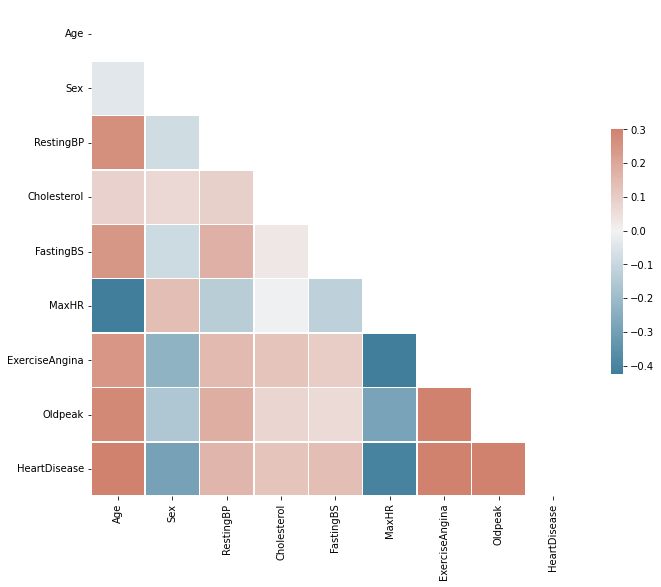

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix 계산하기
corr = data_clean.corr()

# 위 삼각형에대한 마스크 생성하기
mask = np.triu(np.ones_like(corr, dtype=bool))

# matplotlib figure 설정하기
f, ax = plt.subplots(figsize=(11, 9))

# colormap 설정하기
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heatmap 그리기b
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [25]:
corr

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
Age,1.000000,-0.037654,0.265973,0.082755,0.240943,-0.421132,0.243437,0.282855,0.300667
Sex,-0.037654,1.000000,-0.079637,0.066365,-0.089238,0.141409,-0.231688,-0.156589,-0.293904
RestingBP,0.265973,-0.079637,1.000000,0.089372,0.175823,-0.134891,0.151765,0.181298,0.159684
Cholesterol,0.082755,0.066365,0.089372,1.000000,0.025854,-0.004231,0.124270,0.077952,0.124118
FastingBS,0.240943,-0.089238,0.175823,0.025854,1.000000,-0.120510,0.098046,0.063193,0.139046
MaxHR,-0.421132,0.141409,-0.134891,-0.004231,-0.120510,1.000000,-0.424498,-0.286611,-0.403057
ExerciseAngina,0.243437,-0.231688,0.151765,0.124270,0.098046,-0.424498,1.000000,0.474398,0.554793
Oldpeak,0.282855,-0.156589,0.181298,0.077952,0.063193,-0.286611,0.474398,1.000000,0.490160
HeartDisease,0.300667,-0.293904,0.159684,0.124118,0.139046,-0.403057,0.554793,0.490160,1.000000


### 문제 4-3
* 위의 Heat map에서 HeartDisease 열과 연관성이 높은 Age, FastingBS, ExerciseAngina, Oldpeak 열만을 추출하여 data_final DataFrame을 만드세요. 
* HeartDisease 열도 data_final에 포함됩니다. 
* data_final.head()의 결과를 보고서에 업로드하세요.

In [26]:
data_final = data_clean[['Age', 'RestingBP', 'FastingBS', 'ExerciseAngina', 'Oldpeak', 'HeartDisease']]
data_final
data_final.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
1,48,140,0,1,1.5,1
2,64,142,0,1,1.0,1
3,40,130,0,0,0.0,0
4,63,130,1,1,1.8,1
6,60,102,0,0,0.0,0


## 문제 5
* KNN 이해하기

### train과 test set 나누기

In [27]:
# train과 test set을 나누기 위한 함수
from sklearn.model_selection import train_test_split

In [28]:
# 아래 결과는 최초 data를 upload했을 때의 사이즈입니다.
data_final.shape

(915, 6)

In [29]:
# 변수들과 label로 활용할 것을 나누는 작업
X = data_final.drop(['HeartDisease'], axis=1)
y = data_final['HeartDisease']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# 아래 결과는 최초 data를 upload했을 때의 사이즈입니다.
print("X_train's shape : ", X_train.shape)
print("X_test's shape : ", X_test.shape)
print("y_train's shape : ", y_train.shape)
print("y_test's shape : ", y_test.shape)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train.loc[0]

X_train's shape :  (732, 5)
X_test's shape :  (183, 5)
y_train's shape :  (732,)
y_test's shape :  (183,)


Age                54.0
RestingBP         120.0
FastingBS           0.0
ExerciseAngina      0.0
Oldpeak             0.0
Name: 0, dtype: float64

### 문제 5-1, 5-2, 5-3

* 주어진 class Knn을 완성하여 test accuracy가 **0.65 이상**이 나오도록 코드를 완성하세요.


### 문제 5-1
* for문을 **한 번만 사용하여** 두 데이터 사이의 Euclidean Distance를 구하는 dist() 함수를 완성하세요.
* 작성한 코드를 캡처하여 보고서에 업로드하세요.
* 힌트) numpy 에 있는 함수를 사용하세요.


### 문제 5-2
* predict() 함수의 빈 칸을 구현하세요.
* 작성한 코드를 캡처하여 보고서에 업로드하세요.
* 힌트) distance는 dictionary 입니다.

### 문제 5-3
* vote() 함수의 빈 칸을 구현하세요.
* 작성한 코드를 캡처하여 보고서에 업로드하세요.

In [32]:
import tqdm

In [33]:
class Knn():
    
    def __init__(self, n_neighbors): 
        
        ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
        self.k = n_neighbors    
    
        ## knn 은 lazy learning 입니다.
    def fit(self,X,y):
        # train요소
        self.X = X 
        # train답
        self.y = y
        
    def predict(self, test) : 
        y_pred = []
        for i in tqdm.tqdm(range(test.shape[0])):

            ## distance는 dictionary
            ## dist() 구현 => 문제 5-1
            # test -> X_test , test셋 요소
            distance = self.dist(self.X, test.loc[i]) 

            ################  문제 5-2  ####################
            # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
            # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
            ################ 코드 시작  #####################
                            # 코드 작성
            sorted_dist = sorted(distance, key = lambda x: distance[x])
            label_index = []
            label_index += sorted_dist[:self.k]
            labels = []
            for i in label_index:
                labels.append(self.y[i])
            ################ 코드 끝  #######################
            ###############################################
            
            ## labels: k개의 label을 모은 리스트
            ## selected: vote()를 통해 예측한 label 값
            ## vote() 구현 => 문제 5-3
            selected = self.vote(labels) 
   
            y_pred.append(selected)
            
        return y_pred ## 모든 비교가 끝나면 예측된 값이 저장된 y_pred 리스트를 반환합니다.
        

    ## dist: 거리를 계산하는 함수 
    def dist(self, X, y) :

        num_train = X.shape[0]
        dist_dict = {} ## {index : distance} 형태

        for i in range(num_train):
        
        ################  문제 5-1  ####################
        # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
        # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
                        # 코드 작성
            dist_dict[i] = np.sqrt(np.sum(np.power(X.loc[i]-y,2)))

        ################ 코드 끝  ######################
        ##############################################

        return dist_dict ## dictionary


    ## vote: test 데이터의 label을 선택하는 함수
    def vote(self, labels):
      ## labels: k개의 label을 담고 있는 리스트
      selected = 0

      ################  문제 5-3  ####################
      # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
      # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
      ################ 코드 시작  #####################

                    # 코드 작성
      cnt = [0,0]
      for i in labels:
          cnt[i] += 1
      if(cnt[0]<cnt[1]):
          selected = 1
      ################ 코드 끝  ######################
      ##############################################

      return selected

In [34]:
from sklearn.metrics import accuracy_score

# 아래는 test accuracy를 계산하는 코드입니다.
# 아래 코드를 실행시켜 그 결과를 캡처 후 보고서에 업로드하세요

# 아래 숫자는 변경하셔도 상관 없습니다.
classifier = Knn(3)
classifier.fit(X_train, y_train)

# test set에 대해 predict를 진행합니다.
result = classifier.predict(X_test)

# 실제 label과 예측한 label의 score를 계산합니다.
accuracy_score(y_test, result)

100%|██████████| 183/183 [01:11<00:00,  2.55it/s]


0.7486338797814208

### 문제 5-4
* 완성한 Knn을 사용하여 K 값에 따라 변화하는 train accuracy, test accuracy를 그래프로 그리세요.
* 소스코드와 그래프를 **함께** 캡처하여 보고서에 업로드하세요.

In [ ]:
K = [1, 3, 5, 10, 50, 100, 500]
train_acc = []
test_acc = []

################  문제 5-4  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# 소스코드를 입력하고 그래프와 함께 캡처 후 보고서에 업로드 하세요
for i in K:
  classifier = Knn(i)
  classifier.fit(X_train, y_train)
  result = classifier.predict(X_test)
  score = accuracy_score(y_test, result)
  test_acc.append(score)
for i in K:
  classifier = Knn(i)
  classifier.fit(X_train, y_train)
  result = classifier.predict(X_train)
  score = accuracy_score(y_train, result)
  train_acc.append(score)

################ 코드 끝  ######################
# x축을 K값, y축을 정확도로하여 K에 대한 train, test의 정확도에 대한 그래프 생성
plt.figure()
plt.plot(K, train_acc, label='train accuracy')
plt.plot(K, test_acc, label='test accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')

NameError: ignored

In [ ]:
print(train_acc)
print(test_acc)

NameError: ignored

### 문제 5-5
* Knn classifer의 정확도를 0.75 이상으로 개선하는 방법에 대해 고민해보세요.
* 패키지 사용 가능합니다.
* 힌트) HeartDisease 데이터의 0과 1의 비율에 대해서 생각해보세요. 
* 아래 코드를 실행시켜 그 결과를 캡처 후 보고서에 업로드하세요.

In [ ]:
# 코드 개선

In [ ]:
from sklearn.metrics import accuracy_score

# 아래는 test accuracy를 계산하는 코드입니다.
# 아래 코드를 실행시켜 그 결과를 캡처 후 보고서에 업로드하세요

# 아래 숫자는 변경하셔도 상관 없습니다.
classifier = Knn(3)
classifier.fit(X_train, y_train)

# test set에 대해 predict를 진행합니다.
result = classifier.predict(X_test)

# 실제 label과 예측한 label의 score를 계산합니다.
accuracy_score(y_test, result)